# Studio del comportamento del ENC in funzione della corrente di leakage LKG_N con soglia ~1000e e $I_{LDAC}$ ~ $14 \mu A$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.patches as mpatches
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakeage/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni_LKG_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakeage/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni_LKG_5.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakeage/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni_LKG_10.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakeage/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni_LKG_15.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakeage/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni_LKG_20.txt


In [2]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

5 dataframe crated!


In [3]:
lkg = [0, 5, 10, 15, 20] #vettore delle correnti di leakage in nA

In [4]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo)] ###attenzione!!
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [5]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

In [6]:
ENC_B = []
for i in sigmasB:
    ENC_B.append(np.mean(np.asarray(i)))

In [7]:
ENC_A = []
for i in sigmasA:
    ENC_A.append(np.mean(np.asarray(i)))

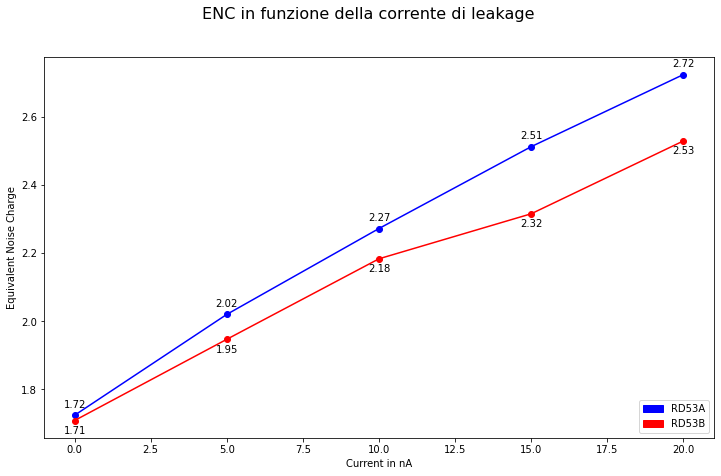

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(lkg, ENC_A, '-o', color ="blue")
ax.plot(lkg, ENC_B, '-o', color = "red")
ax.set_xlabel("Current in nA")
ax.set_ylabel("Equivalent Noise Charge")



blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(ENC_A):        
    ax.annotate(round(txt,2), #text
                (lkg[i], ENC_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(ENC_B):  
    ax.annotate(round(txt,2), #text
                (lkg[i], ENC_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-13), #txt distance from the point
               ha='center') #horizontal alignment

fig.suptitle("ENC in funzione della corrente di leakage", fontsize=16)
plt.show()
